<a href="https://colab.research.google.com/github/pvanand07/Udacity-nd-intro-to-ml/blob/master/Project-1-Predict-Bike-Sharing-Demand-AutoGluon/Bike_Sharing_Demand_AutoGluon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [1]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.6 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 16.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bokeh: filename=bokeh-2.0.1-py3-none-any.whl size=9080019 sha256=e102046bfd7606d98d99654928f2683dadf5da66ef6ba775f92d28f4634fcfb4
  Stored in directory: /root/.cache/pip/wheels/be/b4/d8/7ce778fd6e637bea03a561223a77ba6649aff8168e3c613754
Successfully built bokeh
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1
  Attempting uninstall: bokeh
    Found existing installation: bokeh 2.4.3
    Uninstalling bokeh-2.4.3:
      Successfully uninstalled bokeh-2.4.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. 

### Setup Kaggle API Key

In [2]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [3]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "anandsiva"
kaggle_key = "71c7ff9b391e9a0fba38ae4c7f4b1a6c"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
![kaggle6.png](attachment:kaggle6.png)

In [4]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand --force
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  0% 0.00/189k [00:00<?, ?B/s]
100% 189k/189k [00:00<00:00, 70.3MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [5]:
import pandas as pd
from autogluon.tabular import TabularPredictor
from sklearn.metrics import r2_score, accuracy_score

In [6]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.DataFrame(pd.read_csv("train.csv", parse_dates=["datetime"])).drop(["casual","registered"], axis=1)

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1


In [7]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,977.000000


In [7]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.DataFrame(pd.read_csv("test.csv", parse_dates=["datetime"]))
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(6)
memory usage: 850.6 KB


In [8]:
# Same thing as train and test dataset
submission = test[["datetime"]].copy()
submission.head()

,datetime
0,2011-01-20 00:00:00
1,2011-01-20 01:00:00
2,2011-01-20 02:00:00
3,2011-01-20 03:00:00
4,2011-01-20 04:00:00


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [33]:
predictor = TabularPredictor(label ='count').fit(train)

No path specified. Models will be saved in: "AutogluonModels/ag-20230525_134930/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20230525_134930/"
AutoGluon Version:  0.7.0
Python Version:     3.10.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Train Data Rows:    10886
Train Data Columns: 9
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11002.06 MB
	Train Dat

[1000]	valid_set's rmse: 134.638
[2000]	valid_set's rmse: 134.041
[3000]	valid_set's rmse: 133.477
[4000]	valid_set's rmse: 133.458
[5000]	valid_set's rmse: 133.536


	-133.3552	 = Validation score   (-root_mean_squared_error)
	9.21s	 = Training   runtime
	0.66s	 = Validation runtime
Fitting model: LightGBM ...
	-134.1533	 = Validation score   (-root_mean_squared_error)
	0.94s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-122.3769	 = Validation score   (-root_mean_squared_error)
	15.54s	 = Training   runtime
	0.28s	 = Validation runtime
Fitting model: CatBoost ...
	-135.7009	 = Validation score   (-root_mean_squared_error)
	21.25s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-128.8057	 = Validation score   (-root_mean_squared_error)
	5.4s	 = Training   runtime
	0.15s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-137.154	 = Validation score   (-root_mean_squared_error)
	17.45s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: XGBoost ...
	-135.3561	 = Validation score   (-root_mean_squared_error)
	2.11s	 = Training   runtime
	0.04s	 = Valida

### Review AutoGluon's training run with ranking of models that did the best.

In [34]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model   score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0        KNeighborsDist  -92.442085       0.020575   0.045417                0.020575           0.045417            1       True          2
1   WeightedEnsemble_L2  -92.442085       0.021183   0.425421                0.000608           0.380004            2       True         12
2        KNeighborsUnif -109.739422       0.024364   0.045493                0.024364           0.045493            1       True          1
3       RandomForestMSE -122.376936       0.275828  15.537911                0.275828          15.537911            1       True          5
4         ExtraTreesMSE -128.805704       0.150218   5.399465                0.150218           5.399465            1       True          7
5         LightGBMLarge -131.444917       0.037719   2.255311                0.037719           2.

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif': 'KNNModel',
  'KNeighborsDist': 'KNNModel',
  'LightGBMXT': 'LGBModel',
  'LightGBM': 'LGBModel',
  'RandomForestMSE': 'RFModel',
  'CatBoost': 'CatBoostModel',
  'ExtraTreesMSE': 'XTModel',
  'NeuralNetFastAI': 'NNFastAiTabularModel',
  'XGBoost': 'XGBoostModel',
  'NeuralNetTorch': 'TabularNeuralNetTorchModel',
  'LightGBMLarge': 'LGBModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif': -109.73942190555698,
  'KNeighborsDist': -92.44208479870365,
  'LightGBMXT': -133.35522009040855,
  'LightGBM': -134.15332849636587,
  'RandomForestMSE': -122.37693561579168,
  'CatBoost': -135.70090835580928,
  'ExtraTreesMSE': -128.80570436565253,
  'NeuralNetFastAI': -137.15395635199494,
  'XGBoost': -135.35606730481481,
  'NeuralNetTorch': -139.28546988008708,
  'LightGBMLarge': -131.44491666650094,
  'WeightedEnsemble_L2': -92.44208479870365},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'KNeighborsUnif': '

<Axes: xlabel='model'>

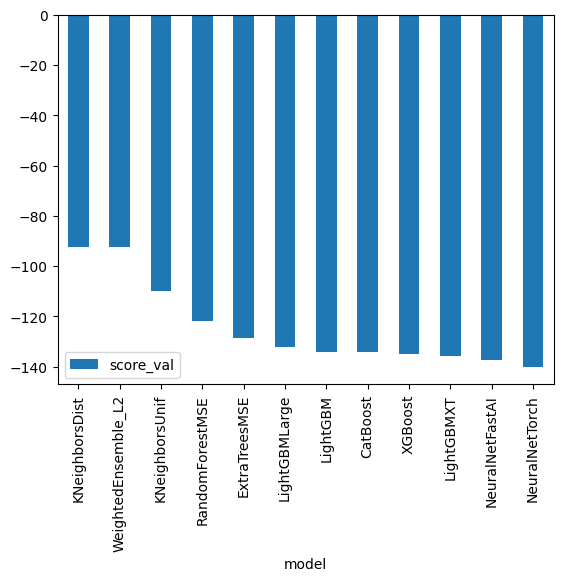

In [12]:
# Output the model's `score_val` in a bar chart to compare performance
predictor.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

### Create predictions from test dataset

In [13]:
predictions = predictor.predict(test)
predictions.head()

0    51.861626
1    56.686295
2    59.077763
3    60.468830
4    61.419930
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [14]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      135.819412
std       132.525269
min         3.424214
25%        23.827692
50%        71.032265
75%       203.938919
max       537.853882
Name: count, dtype: float64

In [15]:
# How many negative values do we have?
0

0

In [16]:
# Set them to zero
0

0

### Set predictions to submission dataframe, save, and submit

In [17]:
predictions.shape

(6493,)

In [20]:
submission.shape

(6493, 2)

In [23]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [24]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 188k/188k [00:00<00:00, 373kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [25]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName        date                 description           status    publicScore  privateScore  
--------------  -------------------  --------------------  --------  -----------  ------------  
submission.csv  2023-05-25 13:26:53  first raw submission  complete  1.86412      1.86412       


#### Initial score of `1.86412`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>],
       [<Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'count'}>],
       [<Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'hour'}>]], dtype=object)

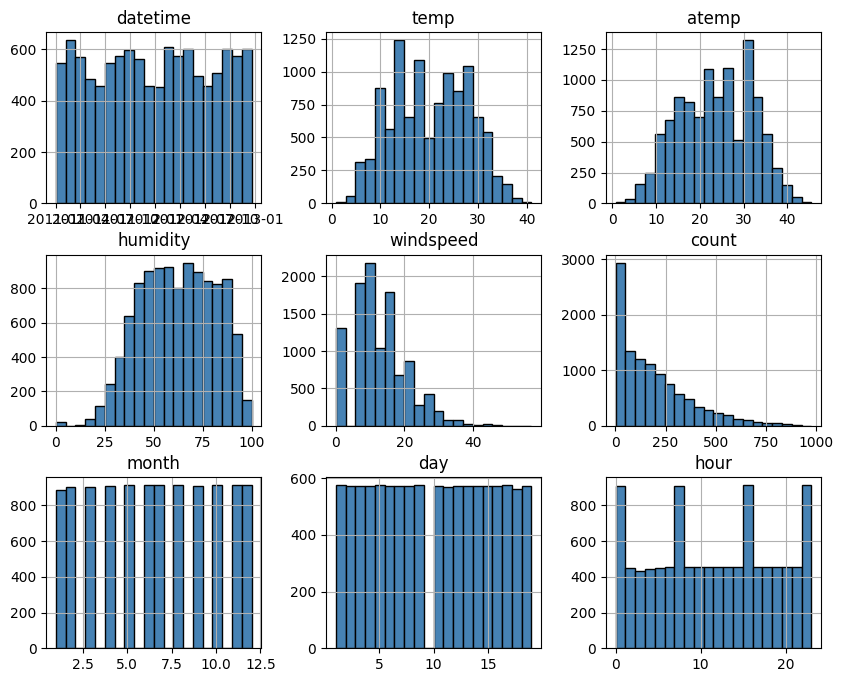

In [39]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(figsize=(10, 8), bins=20, color='steelblue', edgecolor='black')


In [20]:
# create a new feature
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour

test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [21]:
categorical_columns = ["season", "holiday", "workingday", "weather"]
train[categorical_columns] = train[categorical_columns].astype("category")
test[categorical_columns] = test[categorical_columns].astype("category")

In [22]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,1,1,4


array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>],
       [<Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'count'}>],
       [<Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'hour'}>]], dtype=object)

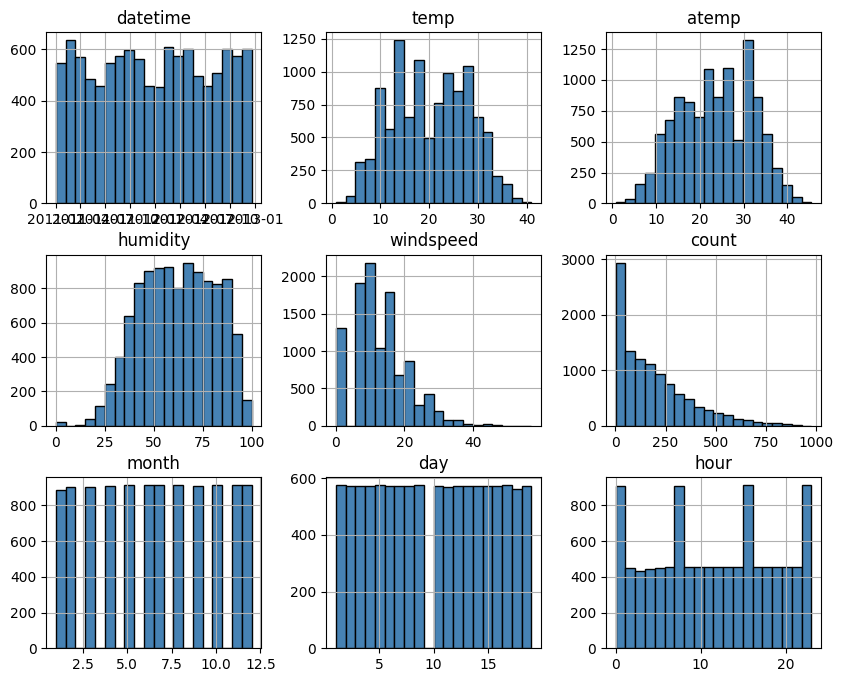

In [38]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(10, 8), bins=20, color='steelblue', edgecolor='black')

## Step 5: Rerun the model with the same settings as before, just with more features

In [41]:
predictor_new_features = TabularPredictor(label='count').fit(train)

No path specified. Models will be saved in: "AutogluonModels/ag-20230525_135535/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20230525_135535/"
AutoGluon Version:  0.7.0
Python Version:     3.10.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Train Data Rows:    10886
Train Data Columns: 12
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    10994.36 MB
	Train Da

[1000]	valid_set's rmse: 37.811
[2000]	valid_set's rmse: 36.1677
[3000]	valid_set's rmse: 35.8409
[4000]	valid_set's rmse: 35.7499
[5000]	valid_set's rmse: 35.7407


	-35.7301	 = Validation score   (-root_mean_squared_error)
	7.74s	 = Training   runtime
	0.6s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's rmse: 35.2001


	-35.1312	 = Validation score   (-root_mean_squared_error)
	2.65s	 = Training   runtime
	0.15s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-38.6329	 = Validation score   (-root_mean_squared_error)
	19.17s	 = Training   runtime
	0.17s	 = Validation runtime
Fitting model: CatBoost ...
	-35.0304	 = Validation score   (-root_mean_squared_error)
	258.77s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-39.914	 = Validation score   (-root_mean_squared_error)
	7.99s	 = Training   runtime
	0.16s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-44.8887	 = Validation score   (-root_mean_squared_error)
	17.48s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: XGBoost ...
	-35.9478	 = Validation score   (-root_mean_squared_error)
	4.07s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-38.8312	 = Validation score   (-root_mean_squared_error)
	91.81s	 = Training   runtime
	0.02s	 = Vali

[1000]	valid_set's rmse: 33.4799


	-33.4669	 = Validation score   (-root_mean_squared_error)
	5.57s	 = Training   runtime
	0.28s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	-32.2361	 = Validation score   (-root_mean_squared_error)
	0.69s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 423.01s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20230525_135535/")


In [42]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2  -32.236122       1.287402  387.902133                0.001107           0.692526            2       True         12
1         LightGBMLarge  -33.466934       0.280798    5.572865                0.280798           5.572865            1       True         11
2              CatBoost  -35.030439       0.077877  258.770348                0.077877         258.770348            1       True          6
3              LightGBM  -35.131237       0.150480    2.650103                0.150480           2.650103            1       True          4
4            LightGBMXT  -35.730106       0.595816    7.743426                0.595816           7.743426            1       True          3
5               XGBoost  -35.947754       0.107610    4.069477                0.107610      

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif': 'KNNModel',
  'KNeighborsDist': 'KNNModel',
  'LightGBMXT': 'LGBModel',
  'LightGBM': 'LGBModel',
  'RandomForestMSE': 'RFModel',
  'CatBoost': 'CatBoostModel',
  'ExtraTreesMSE': 'XTModel',
  'NeuralNetFastAI': 'NNFastAiTabularModel',
  'XGBoost': 'XGBoostModel',
  'NeuralNetTorch': 'TabularNeuralNetTorchModel',
  'LightGBMLarge': 'LGBModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif': -109.73942190555698,
  'KNeighborsDist': -92.44208479870365,
  'LightGBMXT': -35.73010604131577,
  'LightGBM': -35.13123727917639,
  'RandomForestMSE': -38.632855957413454,
  'CatBoost': -35.03043863916755,
  'ExtraTreesMSE': -39.91402618918005,
  'NeuralNetFastAI': -44.88873754917207,
  'XGBoost': -35.94775369716534,
  'NeuralNetTorch': -38.83121038451167,
  'LightGBMLarge': -33.46693428002885,
  'WeightedEnsemble_L2': -32.2361216344697},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'KNeighborsUnif': 'Autogluon

In [43]:
# Remember to set all negative values to zero
prediction_new = predictor_new_features.predict(test)

In [48]:
prediction_new[prediction_new<0] = 0
prediction_new.describe()

count    6493.000000
mean      192.154877
std       172.107727
min         0.000000
25%        46.506161
50%       153.286560
75%       283.459534
max       879.959595
Name: count, dtype: float64

In [49]:
# Same submitting predictions
submission_new_features = test[["datetime"]].copy()
submission_new_features["count"] = prediction_new
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [50]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100% 188k/188k [00:00<00:00, 329kB/s]
Successfully submitted to Bike Sharing Demand

In [51]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description           status    publicScore  privateScore  
---------------------------  -------------------  --------------------  --------  -----------  ------------  
submission_new_features.csv  2023-05-25 14:06:08  new features          complete  0.51788      0.51788       
submission_new_features.csv  2023-05-25 14:02:52  new features          error                                
submission.csv               2023-05-25 13:26:53  first raw submission  complete  1.86412      1.86412       


#### New Score of `0.51788` 

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [23]:
from autogluon.core.models.abstract.abstract_model import time_func
hyperparameters = {
    "hyperparameter_tune": True

}

predictor_new_hpo = TabularPredictor(label='count',eval_metric='r2').fit(train,presets= "best_quality", time_limit = 120)

No path specified. Models will be saved in: "AutogluonModels/ag-20230525_172232/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 120s
AutoGluon will save models to "AutogluonModels/ag-20230525_172232/"
AutoGluon Version:  0.7.0
Python Version:     3.10.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Train Data Rows:    10886
Train Data Columns: 12
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using F

In [24]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                   model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0    WeightedEnsemble_L2   0.963542      10.716329  116.638207                0.000732           0.253793            2       True          4
1      LightGBMXT_BAG_L1   0.963411      10.612773  116.328182               10.612773         116.328182            1       True          3
2  KNeighborsDist_BAG_L1   0.784305       0.102824    0.056233                0.102824           0.056233            1       True          2
3  KNeighborsUnif_BAG_L1   0.685720       0.068206    0.058686                0.068206           0.058686            1       True          1
Number of models trained: 4
Types of models trained:
{'WeightedEnsembleModel', 'StackerEnsembleModel_LGB', 'StackerEnsembleModel_KNN'}
Bagging used: True  (with 8 folds)
Multi-layer stack-ensembling used: False 
Feature Metadata (Pro

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': 0.6857197008702899,
  'KNeighborsDist_BAG_L1': 0.7843047406609882,
  'LightGBMXT_BAG_L1': 0.9634107054980501,
  'WeightedEnsemble_L2': 0.9635415383751704},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'KNeighborsUnif_BAG_L1': 'AutogluonModels/ag-20230525_172232/models/KNeighborsUnif_BAG_L1/',
  'KNeighborsDist_BAG_L1': 'AutogluonModels/ag-20230525_172232/models/KNeighborsDist_BAG_L1/',
  'LightGBMXT_BAG_L1': 'AutogluonModels/ag-20230525_172232/models/LightGBMXT_BAG_L1/',
  'WeightedEnsemble_L2': 'AutogluonModels/ag-20230525_172232/models/WeightedEnsemble_L2/'},
 'model_fit_times': {'KNeighborsUnif_BAG_L1': 0.05868649482727051,
  'KNeighborsDist_BAG_L1': 0.05623316764831543,
  'LightGBMXT_BAG_L1': 116.32818

In [25]:
# Remember to set all negative values to zero
prediction_new_hpo = predictor_new_hpo.predict(test)
prediction_new_hpo[prediction_new_hpo<0] = 0
prediction_new_hpo.describe() 

count    6493.000000
mean      188.517532
std       167.882965
min         0.000000
25%        49.533516
50%       149.985260
75%       276.890594
max       873.070312
Name: count, dtype: float64

In [26]:
# Same submitting predictions
submission_new_hpo = test[["datetime"]].copy()
submission_new_hpo["count"] = prediction_new_hpo
submission_new_hpo.to_csv("submission_new_hpo_v2.csv", index=False)

In [27]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo_v2.csv -m "new features with hyperparameters v2"

100% 188k/188k [00:03<00:00, 52.5kB/s]
Successfully submitted to Bike Sharing Demand

In [28]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                           status    publicScore  privateScore  
---------------------------  -------------------  ------------------------------------  --------  -----------  ------------  
submission_new_hpo_v2.csv    2023-05-25 17:25:17  new features with hyperparameters v2  complete  0.57874      0.57874       
submission_new_hpo.csv       2023-05-25 17:19:48  new features with hyperparameters     complete  2.04374      2.04374       
submission_new_features.csv  2023-05-25 14:06:08  new features                          complete  0.51788      0.51788       
submission_new_features.csv  2023-05-25 14:02:52  new features                          error                                


#### New Score of `0.5784`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

In [ ]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [?, ?, ?]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

In [ ]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [?, ?, ?]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [ ]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": [?, ?, ?],
    "hpo2": [?, ?, ?],
    "hpo3": [?, ?, ?],
    "score": [?, ?, ?]
})